In [3]:
from scipy.io import arff
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [4]:
data = arff.loadarff('/Users/saikrishna/Downloads/ICC/95k-random.arff')
df = pd.DataFrame(data[0])

df.head()

,account_age,no_follower,no_following,no_userfavourites,no_lists,no_tweets,no_retweets,no_hashtag,no_usermention,no_urls,no_char,no_digits,class
0,1235.0,12.0,31.0,0.0,0.0,108.0,0.0,1.0,0.0,1.0,30.0,0.0,b'spammer'
1,695.0,126.0,569.0,16.0,0.0,5048.0,1.0,1.0,2.0,1.0,109.0,1.0,b'spammer'
2,448.0,4.0,63.0,0.0,1.0,860.0,0.0,0.0,0.0,1.0,36.0,4.0,b'spammer'
3,1322.0,8.0,294.0,2.0,0.0,237.0,0.0,0.0,0.0,1.0,35.0,2.0,b'spammer'
4,111.0,1461.0,1365.0,438.0,10.0,6894.0,0.0,1.0,0.0,1.0,55.0,6.0,b'spammer'


In [5]:
df.describe()

,account_age,no_follower,no_following,no_userfavourites,no_lists,no_tweets,no_retweets,no_hashtag,no_usermention,no_urls,no_char,no_digits
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,723.034740,3.796333e+03,1096.206410,879.416480,35.527110,2.085723e+04,279.174850,0.464630,0.413460,1.056640,67.032350,1.513160
std,550.960584,6.028093e+04,8473.488151,5488.341535,667.301557,6.018203e+04,2439.945024,1.205099,0.714574,0.389144,31.849352,2.992507
min,0.000000,-1.000000e+00,-1.000000,-1.000000,0.000000,-1.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,231.000000,5.900000e+01,75.000000,0.000000,0.000000,1.033000e+03,0.000000,0.000000,0.000000,1.000000,42.000000,0.000000
50%,644.000000,2.530000e+02,254.000000,18.000000,1.000000,5.244000e+03,0.000000,0.000000,0.000000,1.000000,68.000000,0.000000
75%,1126.000000,7.740000e+02,684.000000,235.250000,5.000000,1.855700e+04,0.000000,0.000000,1.000000,1.000000,93.000000,2.000000
max,2732.000000,6.535211e+06,753514.000000,326479.000000,83001.000000,2.886309e+06,115372.000000,17.000000,9.000000,6.000000,153.000000,56.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
account_age          100000 non-null float64
no_follower          100000 non-null float64
no_following         100000 non-null float64
no_userfavourites    100000 non-null float64
no_lists             100000 non-null float64
no_tweets            100000 non-null float64
no_retweets          100000 non-null float64
no_hashtag           100000 non-null float64
no_usermention       100000 non-null float64
no_urls              100000 non-null float64
no_char              100000 non-null float64
no_digits            100000 non-null float64
class                100000 non-null object
dtypes: float64(12), object(1)
memory usage: 9.9+ MB


In [7]:
df.columns

Index(['account_age', 'no_follower', 'no_following', 'no_userfavourites',
       'no_lists', 'no_tweets', 'no_retweets', 'no_hashtag', 'no_usermention',
       'no_urls', 'no_char', 'no_digits', 'class'],
      dtype='object')

In [8]:
df.groupby('class')['class'].value_counts()

class           class         
b'non-spammer'  b'non-spammer'    95000
b'spammer'      b'spammer'         5000
Name: class, dtype: int64

In [9]:
df['class'] = df['class'].astype('category').cat.codes

In [10]:
df.groupby('class')['class'].value_counts()

class  class
0      0        95000
1      1         5000
Name: class, dtype: int64

0 - non-spam

1 - spam

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

# Fig. 1. Performance degradation caused by class imbalance

In [12]:
fig1 = []
for i in range(2, 21, 2):
#     for every alpha(class imbalance rate), applied random forest for 10 times
    for j in range(10):
        sample = df[df['class'] == 1].sample(1000)
#         took 1000 as base and multiplied by alpha(class imbalance rate)
        sample = sample.append(df[df['class'] == 0].sample(1000*i), ignore_index=True)

        X = sample.drop('class',axis=1)
        y = sample['class']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50)

        rfc = RandomForestClassifier()
        rfc.fit(X_train, y_train)
        rfc_pred = rfc.predict(X_test)

        matrix = confusion_matrix(y_test,rfc_pred)
#         [TPR, FPR, class imbalance rate]
        fig1.append([matrix[1][1]/float(matrix[1][1] + matrix[1][0]), matrix[0][1]/float(matrix[0][1] + matrix[0][0]), i])

In [13]:
fig1 = pd.DataFrame(fig1)
fig1.head()

,0,1,2
0,0.629412,0.062626,2
1,0.601643,0.055281,2
2,0.573146,0.065934,2
3,0.626283,0.063179,2
4,0.625514,0.063116,2


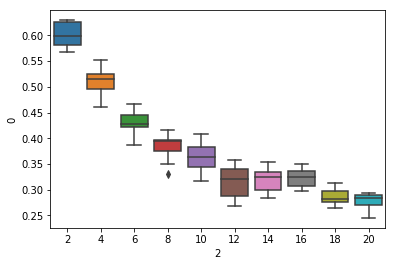

In [14]:
sns.boxplot(fig1[2], fig1[0])

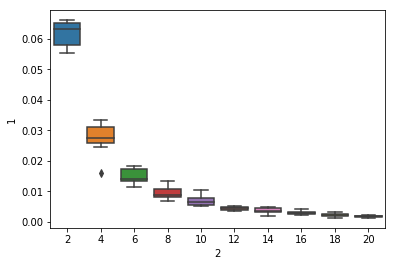

In [15]:
sns.boxplot(fig1[2], fig1[1])

#doubts 

In section 4.1, 600 million tweets are used is given, but in th data set url given, there are only 100k max

how to implement ensemble algo

used more than 1000 spam instances

In [16]:
import math

In [17]:
def ROS(Dplus, alpha):
    return Dplus.append(Dplus.sample(math.ceil(alpha*1000), replace=True), ignore_index=True)

In [18]:
def RUS(Dminus, beta):
    return Dminus.sample(math.ceil((1-beta)*len(Dminus)))

In [19]:
def FOS(Dplus, alpha):
    return Dplus.append(Dplus.sample(math.ceil(alpha*1000), replace=True), ignore_index=True)

In [20]:
def predictEnsemble(ros, rus, fos):
    result = []
    for i in range(len(ros)):
        zero = 0
        one = 0
        if ros[i] == 0:
            zero += 1
        else:
            one += 1
        if rus[i] == 0:
            zero += 1
        else:
            one += 1
        if fos[i] == 0:
            zero += 1
        else:
            one += 1
        if zero > one:
            result.append(0)
        else:
            result.append(1)
    return result

In [21]:
fig1 = []
for i in range(2, 21, 2):
#     for every alpha(class imbalance rate), applied random forest for 10 times
    for j in range(10):
        print(str(i)+":")
        print(j)
#         taking 4k spam and 80k non-spam, then ROS is valid for class imbalance rate 20(no need to add samples as 80k/4k = 20)
        dplus = df[df['class'] == 1].sample(4000) # spam
        dminus = df[df['class'] == 0].sample(80000) # non-spam
        
        
#         Random over sampling
        sample = dminus.append(ROS(dplus, (80.0/i) - 4) , ignore_index=True)

        X = sample.drop('class',axis=1)
        y = sample['class']
        print(y.value_counts())

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50)

        rfc1 = RandomForestClassifier()
        rfc1.fit(X_train, y_train)
        rfc_pred = rfc1.predict(X_test)

        matrix = confusion_matrix(y_test,rfc_pred)
#         [TPR, FPR, precision, class imbalance rate]
        fig1.append([matrix[1][1]/float(matrix[1][1] + matrix[1][0]), matrix[0][1]/float(matrix[0][1] + matrix[0][0]), matrix[1][1]/float(matrix[1][1] + matrix[0][1]), i, "ROS"])
                               
                               
#         Random under sampling
        sample = dplus.append(RUS(dminus, (20 - i)/20.0) , ignore_index=True)

        X = sample.drop('class',axis=1)
        y = sample['class']
        print(y.value_counts())

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50)

        rfc2 = RandomForestClassifier()
        rfc2.fit(X_train, y_train)
        rfc_pred = rfc2.predict(X_test)

        matrix = confusion_matrix(y_test,rfc_pred)
#         [TPR, FPR, precision, class imbalance rate]
        fig1.append([matrix[1][1]/float(matrix[1][1] + matrix[1][0]), matrix[0][1]/float(matrix[0][1] + matrix[0][0]), matrix[1][1]/float(matrix[1][1] + matrix[0][1]), i, "RUS"])
        
        
#         Fuzzy based over sampling
        sample = dminus.append(FOS(dplus, (80.0/i) - 4) , ignore_index=True)

        X = sample.drop('class',axis=1)
        y = sample['class']
        print(y.value_counts())

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50)

        rfc3 = RandomForestClassifier()
        rfc3.fit(X_train, y_train)
        rfc_pred = rfc3.predict(X_test)

        matrix = confusion_matrix(y_test,rfc_pred)
#         [TPR, FPR, precision, class imbalance rate]
        fig1.append([matrix[1][1]/float(matrix[1][1] + matrix[1][0]), matrix[0][1]/float(matrix[0][1] + matrix[0][0]), matrix[1][1]/float(matrix[1][1] + matrix[0][1]), i, "FOS"])
                              
        
        
#         Ensemble learning algorithm
        X_train, X_test, y_train, y_test = train_test_split(df.drop('class',axis=1), df['class'], test_size=0.50)
#         predict with half of entire sample size

        rfc_pred1 = rfc1.predict(X_test)
        rfc_pred2 = rfc2.predict(X_test)
        rfc_pred3 = rfc3.predict(X_test)
        rfc_pred4 = predictEnsemble(rfc_pred1, rfc_pred2, rfc_pred3)
    
        matrix = confusion_matrix(y_test,rfc_pred4)
#         [TPR, FPR, precision, class imbalance rate]
        fig1.append([matrix[1][1]/float(matrix[1][1] + matrix[1][0]), matrix[0][1]/float(matrix[0][1] + matrix[0][0]), matrix[1][1]/float(matrix[1][1] + matrix[0][1]), i, "Ensemble"])

2:
0
0    80000
1    40000
Name: class, dtype: int64
0    8000
1    4000
Name: class, dtype: int64
0    80000
1    40000
Name: class, dtype: int64
2:
1
0    80000
1    40000
Name: class, dtype: int64
0    8000
1    4000
Name: class, dtype: int64
0    80000
1    40000
Name: class, dtype: int64
2:
2
0    80000
1    40000
Name: class, dtype: int64
0    8000
1    4000
Name: class, dtype: int64
0    80000
1    40000
Name: class, dtype: int64
2:
3
0    80000
1    40000
Name: class, dtype: int64
0    8000
1    4000
Name: class, dtype: int64
0    80000
1    40000
Name: class, dtype: int64
2:
4
0    80000
1    40000
Name: class, dtype: int64
0    8000
1    4000
Name: class, dtype: int64
0    80000
1    40000
Name: class, dtype: int64
2:
5
0    80000
1    40000
Name: class, dtype: int64
0    8000
1    4000
Name: class, dtype: int64
0    80000
1    40000
Name: class, dtype: int64
2:
6
0    80000
1    40000
Name: class, dtype: int64
0    8000
1    4000
Name: class, dtype: int64
0    80000
1    400

0    48000
1     4000
Name: class, dtype: int64
0    80000
1     6667
Name: class, dtype: int64
12:
6
0    80000
1     6667
Name: class, dtype: int64
0    48000
1     4000
Name: class, dtype: int64
0    80000
1     6667
Name: class, dtype: int64
12:
7
0    80000
1     6667
Name: class, dtype: int64
0    48000
1     4000
Name: class, dtype: int64
0    80000
1     6667
Name: class, dtype: int64
12:
8
0    80000
1     6667
Name: class, dtype: int64
0    48000
1     4000
Name: class, dtype: int64
0    80000
1     6667
Name: class, dtype: int64
12:
9
0    80000
1     6667
Name: class, dtype: int64
0    48000
1     4000
Name: class, dtype: int64
0    80000
1     6667
Name: class, dtype: int64
14:
0
0    80000
1     5715
Name: class, dtype: int64
0    56000
1     4000
Name: class, dtype: int64
0    80000
1     5715
Name: class, dtype: int64
14:
1
0    80000
1     5715
Name: class, dtype: int64
0    56000
1     4000
Name: class, dtype: int64
0    80000
1     5715
Name: class, dtype: int64
14:


In [22]:
fig1 = pd.DataFrame(fig1)
fig1.head()

,0,1,2,3,4
0,0.997828,0.009551,0.980931,2,ROS
1,0.662645,0.049614,0.868820,2,RUS
2,0.996015,0.009994,0.980436,2,FOS
3,0.921506,0.007473,0.866340,2,Ensemble
4,0.993978,0.010256,0.979671,2,ROS


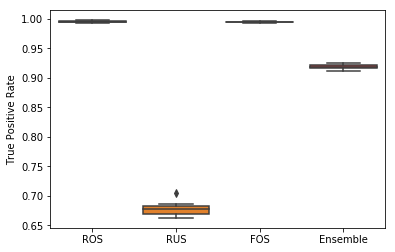

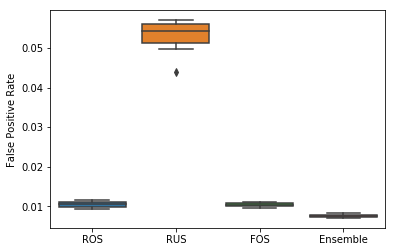

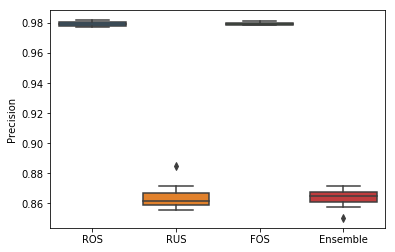

In [23]:
# class impbalance rate 2
fig = fig1[fig1[3] == 2]
sns.boxplot(fig[4], fig[0])
plt.xlabel("")
plt.ylabel("True Positive Rate")
plt.show()
# TPR

fig = fig1[fig1[3] == 2]
sns.boxplot(fig[4], fig[1])
plt.xlabel("")
plt.ylabel("False Positive Rate")
plt.show()
# FPR

fig = fig1[fig1[3] == 2]
sns.boxplot(fig[4], fig[2])
plt.xlabel("")
plt.ylabel("Precision")
plt.show()
# precision

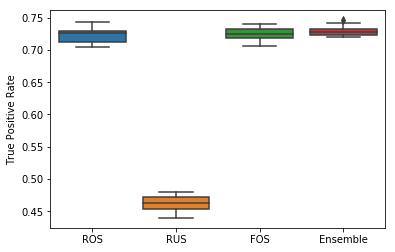

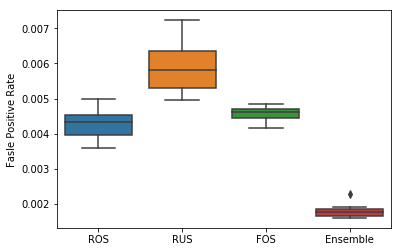

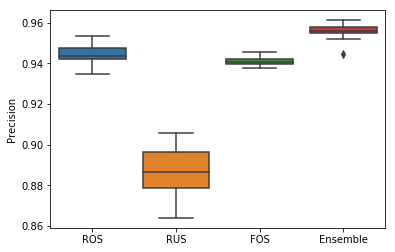

In [24]:
# class impbalance rate 10
fig = fig1[fig1[3] == 10]
sns.boxplot(fig[4], fig[0])
plt.xlabel("")
plt.ylabel("True Positive Rate")
plt.show()
# TPR

fig = fig1[fig1[3] == 10]
sns.boxplot(fig[4], fig[1])
plt.xlabel("")
plt.ylabel("Fasle Positive Rate")
plt.show()
# FPR

fig = fig1[fig1[3] == 10]
sns.boxplot(fig[4], fig[2])
plt.xlabel("")
plt.ylabel("Precision")
plt.show()
# precision

Text(0.5,0,'Class Imbalance Rate')

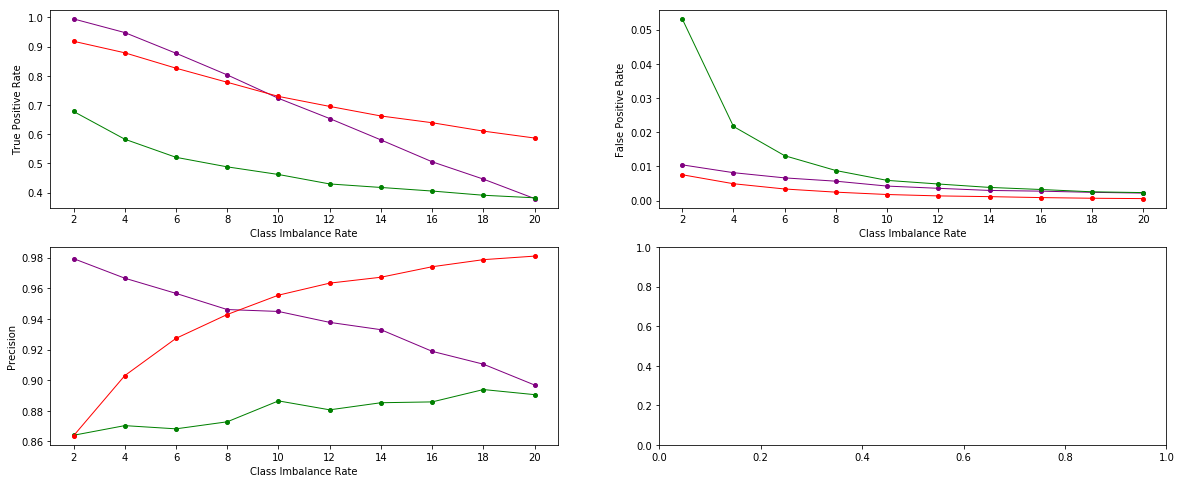

In [25]:
fig, ax = plt.subplots(2,2, figsize=(20,8))

# TPR
fig = fig1[fig1[4] == 'ROS']
fig = fig.groupby(3).mean()
fig[4] = fig.index

ax[0][0].set_xticks([2, 4, 6, 8, 10, 12, 14, 16, 18, 20])

ax[0][0].plot(fig[4], fig[0], color="purple", lw=1, ls='-', marker='o', markersize=4)

fig = fig1[fig1[4] == 'RUS']
fig = fig.groupby(3).mean()
fig[4] = fig.index

ax[0][0].plot(fig[4], fig[0], color="green", lw=1, ls='-', marker='o', markersize=4)

fig = fig1[fig1[4] == 'Ensemble']
fig = fig.groupby(3).mean()
fig[4] = fig.index

ax[0][0].plot(fig[4], fig[0], color="red", lw=1, ls='-', marker='o', markersize=4)

ax[0][0].set_ylabel('True Positive Rate')
ax[0][0].set_xlabel('Class Imbalance Rate')

# FPR
fig = fig1[fig1[4] == 'ROS']
fig = fig.groupby(3).mean()
fig[4] = fig.index

ax[0][1].set_xticks([2, 4, 6, 8, 10, 12, 14, 16, 18, 20])

ax[0][1].plot(fig[4], fig[1], color="purple", lw=1, ls='-', marker='o', markersize=4)

fig = fig1[fig1[4] == 'RUS']
fig = fig.groupby(3).mean()
fig[4] = fig.index

ax[0][1].plot(fig[4], fig[1], color="green", lw=1, ls='-', marker='o', markersize=4)

fig = fig1[fig1[4] == 'Ensemble']
fig = fig.groupby(3).mean()
fig[4] = fig.index

ax[0][1].plot(fig[4], fig[1], color="red", lw=1, ls='-', marker='o', markersize=4)

ax[0][1].set_ylabel('False Positive Rate')
ax[0][1].set_xlabel('Class Imbalance Rate')

# Precision
fig = fig1[fig1[4] == 'ROS']
fig = fig.groupby(3).mean()
fig[4] = fig.index

ax[1][0].set_xticks([2, 4, 6, 8, 10, 12, 14, 16, 18, 20])

ax[1][0].plot(fig[4], fig[2], color="purple", lw=1, ls='-', marker='o', markersize=4)

fig = fig1[fig1[4] == 'RUS']
fig = fig.groupby(3).mean()
fig[4] = fig.index

ax[1][0].plot(fig[4], fig[2], color="green", lw=1, ls='-', marker='o', markersize=4)

fig = fig1[fig1[4] == 'Ensemble']
fig = fig.groupby(3).mean()
fig[4] = fig.index

ax[1][0].plot(fig[4], fig[2], color="red", lw=1, ls='-', marker='o', markersize=4)

ax[1][0].set_ylabel('Precision')
ax[1][0].set_xlabel('Class Imbalance Rate')

I think since I'm using more data to train(80k, 40k) TPR is high for class imbalance rate 2(ROS)(Fig 1)

If we reduce data intances(8k,4k), TPR will be same as in the paper